In [ ]:
!pip install stitching

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import stitching
import matplotlib.pyplot as plt
import cv2 as cv
from datetime import datetime
import time
import numpy as np

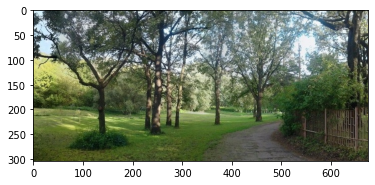

In [ ]:
#%%
image = cv.cvtColor(cv.imread('/content/sample_data/orig.jpg'), cv.COLOR_BGR2RGB)
plt.imshow(image)
#%%
image_l = cv.cvtColor(cv.imread('/content/sample_data/l.jpg'), cv.COLOR_BGR2RGB)
plt.imshow(image_l)
#%%
image_r = cv.cvtColor(cv.imread('/content/sample_data/r.jpg'), cv.COLOR_BGR2RGB)
plt.imshow(image_r)
#%%
sift_stp = {"detector": "sift", "confidence_threshold": 0.2}
sift_stitcher = stitching.Stitcher(**sift_stp)

In [ ]:
sift_stp = {"detector": "sift", "confidence_threshold": 0.2}
sift_stitcher = stitching.Stitcher(**sift_stp)

orb_stp = {"detector": "orb", "confidence_threshold": 0.2}
orb_stitcher = stitching.Stitcher(**orb_stp)

SIFT time:  0:01:01.549046


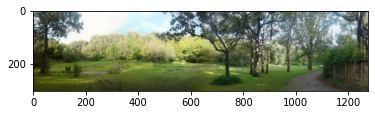

In [ ]:
# SIFT
start_time = datetime.now()

res_sift = cv.cvtColor(sift_stitcher.stitch(['/content/sample_data/l.jpg', '/content/sample_data/r.jpg']), cv.COLOR_BGR2RGB)
plt.imshow(res_sift)

print("SIFT time: ", datetime.now() - start_time)

ORB time:  0:00:00.406887


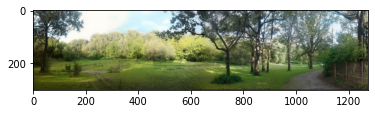

In [ ]:
# ORB
start_time = datetime.now()

res_orb = cv.cvtColor(orb_stitcher.stitch(['/content/sample_data/l.jpg', '/content/sample_data/r.jpg']), cv.COLOR_BGR2RGB)
plt.imshow(res_orb)

print("ORB time: ", datetime.now() - start_time)

In [ ]:
cv2 = cv
star = cv2.xfeatures2d.StarDetector_create()
kp = star.detect(cv2.cvtColor(cv2.imread('/content/sample_data/orig.jpg'), cv2.COLOR_BGR2GRAY),None)
BRIEF = cv2.xfeatures2d.BriefDescriptorExtractor_create()
kp_1, des_1 = BRIEF.compute(cv2.cvtColor(cv2.imread('/content/sample_data/l.jpg'), cv2.COLOR_BGR2GRAY), kp)
kp_2, des_2 = BRIEF.compute(cv2.cvtColor(cv2.imread('/content/sample_data/r.jpg'), cv2.COLOR_BGR2GRAY), kp)
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = bf.knnMatch(des_1, des_2,k=2)

good = []
for m, n in matches:
    if m.distance < 0.9 * n.distance:
        good.append(m)

108


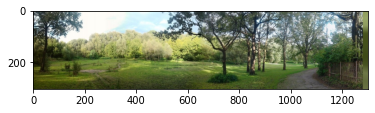

In [ ]:
src_pts = np.float32([ kp_1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
dst_pts = np.float32([ kp_2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
dst = cv2.warpPerspective(cv2.cvtColor(cv2.imread('/content/sample_data/l.jpg'), cv2.COLOR_BGR2RGB), M, ((cv2.cvtColor(cv2.imread('/content/sample_data/l.jpg'), cv2.COLOR_BGR2RGB).shape[1] + cv2.cvtColor(cv2.imread('/content/sample_data/r.jpg'), cv2.COLOR_BGR2RGB).shape[1]), cv2.cvtColor(cv2.imread('/content/sample_data/r.jpg'), cv2.COLOR_BGR2RGB).shape[0])) 
dst[0:cv2.cvtColor(cv2.imread('/content/sample_data/r.jpg'), cv2.COLOR_BGR2RGB).shape[0], 0:cv2.cvtColor(cv2.imread('/content/sample_data/orig.jpg'), cv2.COLOR_BGR2RGB).shape[1]] = cv2.cvtColor(cv2.imread('/content/sample_data/orig.jpg'), cv2.COLOR_BGR2RGB)
dst[0:cv2.cvtColor(cv2.imread('/content/sample_data/l.jpg'), cv2.COLOR_BGR2RGB).shape[0], 0:cv2.cvtColor(cv2.imread('/content/sample_data/l.jpg'), cv2.COLOR_BGR2RGB).shape[1]] = cv2.cvtColor(cv2.imread('/content/sample_data/l.jpg'), cv2.COLOR_BGR2RGB)
dst = dst[:, :1300]
plt.imshow(dst)